# Machine Learning for the Classification of Exoplanets

"The NASA Exoplanet Archive is an online astronomical exoplanet and stellar catalog and data service that collates and cross-correlates astronomical data and information on exoplanets and their host stars, and provides tools to work with these data. The archive is dedicated to collecting and serving important public data sets involved in the search for and characterization of extrasolar planets and their host stars. These data include stellar parameters (such as positions, magnitudes, and temperatures), exoplanet parameters (such as masses and orbital parameters) and discovery/characterization data (such as published radial velocity curves, photometric light curves, images, and spectra)."
https://exoplanetarchive.ipac.caltech.edu/docs/intro.html

### This notebook explores different machine learning models for the purpose of classifying celestial bodies as exoplanets, or as other phenomena.


### Below is a survey of the machine learning algorithms considered for this model:

#### Linear Regression - Regression, Supervised

Numerical Data only. Requires a training set. Optimizes a cost function, generally the mean squared error of test predictions versus known values, where the model used for the predictions is of the form y = optimized_1 * x + optimized_2

#### Multiple Linear Regression - Regression, Supervised

Same as Linear Regression, but where the model is of the form y = o_1 * f_1 + ... o_n * f_n + o_bias

#### Logistic Regression - Classification, Supervised

Numerical data only. Requires a training set. Models probabilities by optimizing a cost function where the model used for the prediction of probability = 1 / (1 + e ^ -(o_1 + o_2 * x))

#### Multiple Logistic Regression - Classification, Supervised

Same as Logistic Regression, but where the model is of the form p = 1 / (1 + e ^ -(o_0 + o_1 * x_1 + ... o_n * x_n))

#### Decision Tree - Classification and Regression, Supervised

Numerical and categorical data. Requires a training set. Creates decision points based model features such that the information of a decision is maximized.

#### Random Forest  Classifier - Classification, Supervised

Numerical and categorical data. Requires a training set. Comes to a decision based via majority voting of several decision trees.


#### K Nearest Neighbors - Classification, Supervised

Numerical data only and number, "K", of neighbors to consider in labeling. Does not require a training data set. Starting with labeled data (generally two groups), a new, unlabeled datum is considered and is labeled according to the labels of data that are close by. Requires some notion of "distance" and requires a user-defined number "K" of the closest neighbors to consider when labeling new data. Groups may or may not be entirely separable by a hyperplane

#### Support Vector Machine - Classification, Supervised

Numerical data only. Requires a training set. Optimizes a "hyperplane", a feature or an engineered feature, that separates classes. Tuning parameters included regularization which controls how linear the hyperplane is in that feature space, and gamma, which controls how close data must be to the hyperplane to be considered in the optimization.

#### K Means - Clustering, Unsupervised

Requires numerical data only and a number of "centroids" = K. Optimizes the positions of the "K" number of centroids such that the mean of the distances of members of the clusters to its centroid is minimized.


#### Neural Network - Classification, Supervised

Numerical data only. Requires a training set. Simulation of infinite mathematical functions given a set of inputs. Simulates a neural network as "layer" of "neurons" consisting of a bias and and a variable number of weights. Inputs are either combined (multiplied for weights, added for biases) with the layer to create output function or functions. The output functions are "activated" (commonly with something like hyperbolic function) when the function is above some threshold. Activation may be a discrete or continuous function of the output function.


#### Deep Neural Network - Classification, Supervised

Same as a neural network, but when multiple, sequential layers determine the output function. 



# Data Source

Nasa Exoplanet Archive

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read data from the Kepler Space Observatory
# https://www.kaggle.com/nasa/kepler-exoplanet-search-results
df = pd.read_csv('../data/cumulative.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


(30, 3)
R2 Score: 0.9999838079561165


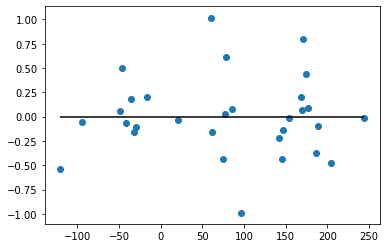

In [3]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()